### **General Data Overview**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#load dataset
df = pd.read_excel("/content/drive/MyDrive/online_retail_II.xlsx")

#overview of dataset
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
print("(Rows, Columns) => ", df.shape, "\n")
print("Data info:\n", df.info())

#Check for missing values and duplicates
print("\nThe missing values in this dataset are displayed below: \n", df.isna().sum())
print(f"Duplicate values in this dataset are: \n {df.duplicated().sum()}")


(Rows, Columns) =>  (525461, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
Data info:
 None

The missing values in this dataset are displayed below: 
 Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
Duplicate

In [3]:
#display summary statistics
print("\nBasic statistics is displayed below:")
df.describe().T


Basic statistics is displayed below:


,count,mean,min,25%,50%,75%,max,std
Quantity,525461.0,10.337667,-9600.0,1.0,3.0,10.0,19152.0,107.42411
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0,4.688834,-53594.36,1.25,2.1,4.21,25111.09,146.126914
Customer ID,417534.0,15360.645478,12346.0,13983.0,15311.0,16799.0,18287.0,1680.811316


In [4]:
df = df.astype(
    {
        "Invoice":"str",
        "StockCode": "str"
    }
)
print("(Rows, Columns) => ", df.shape, "\n")


#drop duplicates
df = df.drop_duplicates()
print(df.info())

(Rows, Columns) =>  (525461, 8) 

<class 'pandas.core.frame.DataFrame'>
Index: 518596 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      518596 non-null  object        
 1   StockCode    518596 non-null  object        
 2   Description  515668 non-null  object        
 3   Quantity     518596 non-null  int64         
 4   InvoiceDate  518596 non-null  datetime64[ns]
 5   Price        518596 non-null  float64       
 6   Customer ID  410763 non-null  float64       
 7   Country      518596 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.6+ MB
None


In [5]:
#Check % missing values
print(df.isna().sum()/len(df) * 100)

Invoice         0.000000
StockCode       0.000000
Description     0.564601
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    20.793257
Country         0.000000
dtype: float64


### **Dealing with Missing Values**
1. Description => 2,928 missing values (0.56%)
2. Customer ID => 107,833 missing values (20.79%)

=== Insights & Handling Strategy ===
1. Description
While 0.56% of product names are missing, this has minimal impact on the dataset. Since StockCode (a unique and complete product identifier) has no missing values, it can reliably serve as a proxy for Description.
→ No immediate imputation required; StockCode will be used in place of Description when needed.

2. Customer ID
The absence of customer ids in over 20% of rows may be due to several factors — guest checkouts, users skipping login, or system logging issues. While these are valid transactions, the lack of customer IDs limits any behavior-based analysis such as segmentation, retention, or RFM.

  To retain the full dataset and simplify analysis, missing Customer IDs will be treated as 'guest' accounts.

In [6]:
#Create a Description look-up dataframe
desc_lookup = df[["StockCode", "Description"]].dropna()

#drop "Description" from the main dataset
df = df.drop(columns= "Description")
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
## Fill missing Customer IDs with Guest value of "10101"
###Usin 10101 to ensure we have a consistent data type - float for the 'Customer column'
df["Customer ID"] = df["Customer ID"].fillna(10101)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518596 entries, 0 to 525460
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      518596 non-null  object        
 1   StockCode    518596 non-null  object        
 2   Quantity     518596 non-null  int64         
 3   InvoiceDate  518596 non-null  datetime64[ns]
 4   Price        518596 non-null  float64       
 5   Customer ID  518596 non-null  float64       
 6   Country      518596 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 31.7+ MB


### **Feature Customization/ Engineering**

In [8]:
time_list = df["InvoiceDate"].apply(lambda val: val.strftime("%H:%M")).to_list()
time_dict = {
    t :
    (
        "Morning" if 1<= int(t[:2]) < 12
        else "Noon" if 12<= int(t[:2]) < 16
    else "Night"
    )
    for t in time_list
}

#Create meaningful features from the "InvoiceDate" column
df["InvoiceDate(Day)"] = df["InvoiceDate"].apply(lambda val: val.strftime("%a"))
df["InvoiceDate(Month)"] = df["InvoiceDate"].apply(lambda val: val.strftime("%b"))
df["InvoiceDate(Year)"] = df["InvoiceDate"].apply(lambda val: val.strftime("%Y"))
df["InvoiceDate(Time)"] = df["InvoiceDate"].apply(lambda val: val.strftime("%H:%M")).map(time_dict)
df["Total_Sales(£)"] = df["Quantity"] * df["Price"]
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate(Day),InvoiceDate(Month),InvoiceDate(Year),InvoiceDate(Time),Total_Sales(£)
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Tue,Dec,2009,Morning,83.4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Tue,Dec,2009,Morning,81.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Tue,Dec,2009,Morning,81.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Tue,Dec,2009,Morning,100.8
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Tue,Dec,2009,Morning,30.0


In [9]:
# df = df.drop(columns = "InvoiceDate")
# df.info()

- Dropped the "InvoiceDate" column because it has been converted into more useful features that will give more insights
- Also, according to proper research, the "Price" in the dataset was represented in Pounds(£)

#### Update: The Case of `StockCode` & `Description`

While working, I initially dropped the `Description` column due to a small number of missing values (~0.56%). But curiosity pulled me back in.

I started wondering — does each `StockCode` truly represent a single, unique product?

So I did a quick check:


In [10]:
len(desc_lookup['StockCode'].unique()), len(desc_lookup['Description'].unique())

(4276, 4681)

##### Wait, what?
There are more unique `Descriptions` than `StockCodes`**. That blew my mind a bit.

It turns out that some stock codes actually point to **multiple product descriptions** — likely variations, bundles, or inconsistencies in how products were entered.

This small moment reminded me again:

>**Explore first. Delete later.** Even tiny columns can carry unexpected value.


### **Exploratory Data Analysis (EDA)**
- Transaction-Level Insights:
- Country-level insights:
- Time-Based Analysis:
- Product Level Analysis:
- Customer Behaviour Analysis
- Chceck returns and refunds
- Correlations & Distributions

#### **Insights from Group-By & Aggregation**

In [11]:
# Group by Invoice

#1. Total sales and Quantity per Invoice
grouped_by_invoice = df.groupby("Invoice")[["Quantity","Total_Sales(£)"]].sum().sort_values(by= ["Quantity"], ascending=False)
grouped_by_invoice

,Quantity,Total_Sales(£)
Invoice,,
518505,87167,11880.84
524174,87167,11880.84
497946,83774,16973.10
501534,63974,6866.30
495194,63302,6989.40
...,...,...
530348,-9000,0.00
504311,-9200,0.00
C536757,-9360,-280.80


##### **Note**

> Oops! Just realized the dataset includes some negative and zero values.
>
> * Negative `Quantity` values likely represent refunds or product returns.
> * Zero `Quantity` or `Total Sales` values may indicate data entry errors or **canceled orders**.
>
> What I'll Do:
>
> 1. Split the dataset into two:
>
>    * `sales_df`: Represents confirmed sales only — used for core EDA and modeling.
>    * `refunds_df`: Contains all refunds, which will be analyzed separately to gain insights such as:
>
>      * Countries with the most refunds
>      * Most returned products
>      * Return patterns over time
>
> This way, I can avoid skewing my core sales analysis while still extracting meaningful business insights from refund behavior.


In [12]:
#split datasets
sales_df = df[df['Quantity'] > 0]
refunds_df = df[df['Quantity']< 0]

print(f"Length of Sales df: {len(sales_df)}\nLength of Refunds df: {len(refunds_df)}")

#Filter out invalid sales
sales_df = sales_df[sales_df['Total_Sales(£)'] > 0]

Length of Sales df: 506294
Length of Refunds df: 12302


##### **Perform EDA on Sales_df**

###### 1. Group by Invoice:
> Transaction-Level Insights -- Understand order size, basket value, and sales variance across transactions

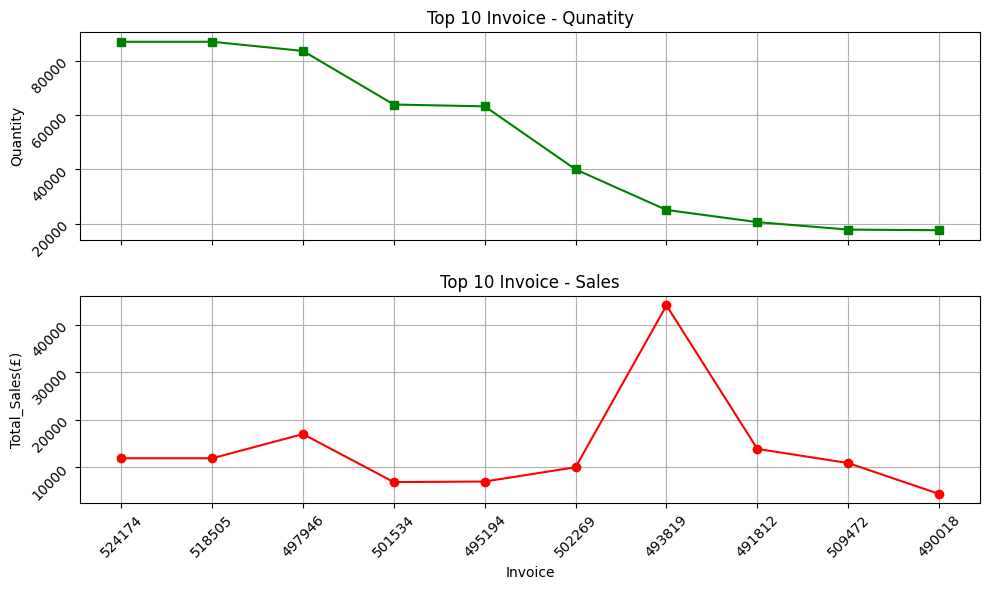

In [13]:
#1. Total sales and Quantity per Invoice
grouped_by_invoice = sales_df.groupby("Invoice")[["Quantity","Total_Sales(£)"]].sum().sort_values(by= ["Quantity"], ascending=False)

#Top 10 & Last 10
top_10 = grouped_by_invoice.head(10)


#Visualize
fig, (ax1, ax2) = plt.subplots(2, 1, figsize= (10, 6), sharex = True)

#plot Quantity
ax1.plot(
    top_10.index, top_10["Quantity"], marker= 's', color= 'green',
    )
ax1.set_ylabel("Quantity")
ax1.set_title("Top 10 Invoice - Qunatity")

ax2.plot(
    top_10.index, top_10["Total_Sales(£)"], marker= 'o', color= 'red'
)
ax2.set_xlabel("Invoice")
ax2.set_ylabel("Total_Sales(£)")
ax2.set_title("Top 10 Invoice - Sales")

for ax in [ax1,ax2]:
  ax.grid(True)
  ax.tick_params(axis= 'both', rotation=45)

plt.tight_layout()
plt.show()

In [14]:
#2. Average number of items per basket
average_items_per_basket = sales_df.groupby("Invoice")["Quantity"].sum().mean()
print("The average items per Invoice is:", average_items_per_basket)

#3. % Invoices that are refunds
print(f"The % Invoices that are refunds: {(len(refunds_df)/len(df)) * 100 :.2f}%")


The average items per Invoice is: 277.44119893088964
The % Invoices that are refunds: 2.37%


###### Group by Country
> Country-Level Analysis -- Identify high-value countries and regions with high return risk or low conversion.

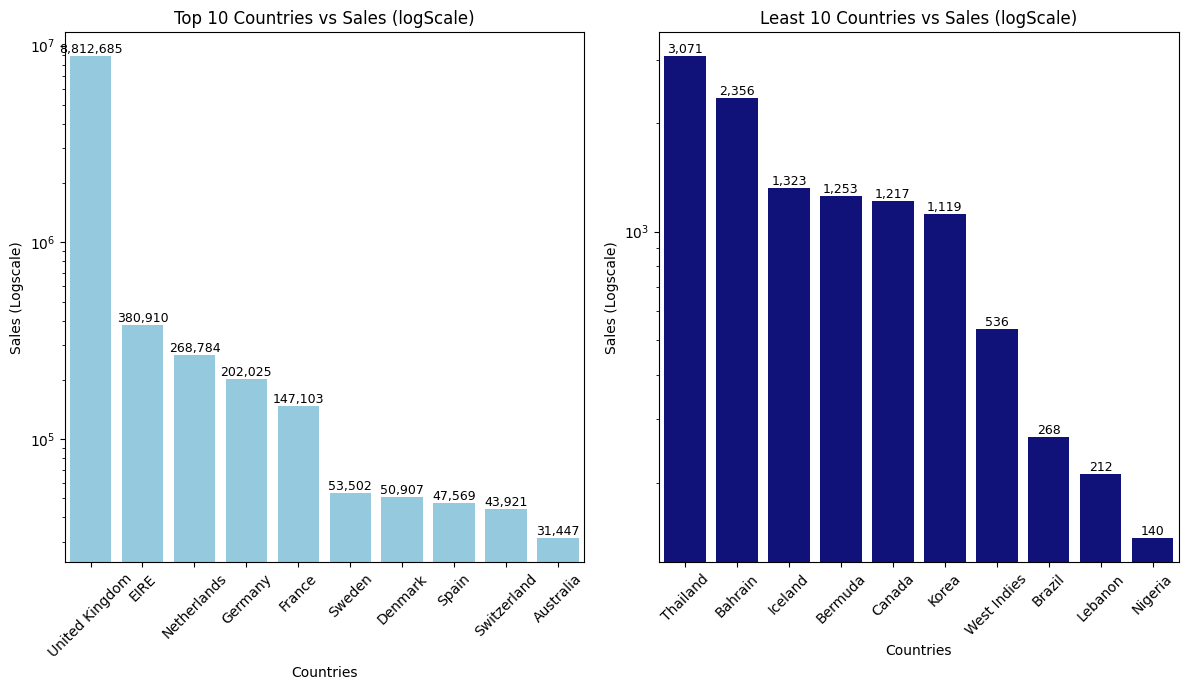

In [15]:
#1. Total sales per country:
total_sales_per_country = sales_df.groupby("Country")["Total_Sales(£)"].sum()
top_10_Countries_by_sales = total_sales_per_country.sort_values(ascending= False).head(10)

least_10_countries = total_sales_per_country.sort_values(ascending=False).tail(10)


#Visualize Countries based on purchase
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (12,7))
for ax in [ax1,ax2]:
  if ax == ax1:
    barplot = sns.barplot(x= top_10_Countries_by_sales.index, y= top_10_Countries_by_sales.values, color= 'skyblue', ax=ax)
    ax.set_title("Top 10 Countries vs Sales (logScale)")
  else:
    barplot = sns.barplot(x= least_10_countries.index, y= least_10_countries.values, color= 'darkblue', ax=ax)
    ax.set_title("Least 10 Countries vs Sales (logScale)")
  ax.set_yscale(value= "log")
  ax.set_xlabel("Countries")
  ax.set_ylabel("Sales (Logscale)")
  ax.tick_params(axis= 'x', rotation= 45)
  for b in barplot.patches:
    barplot.annotate(
        f'{b.get_height():,.0f}', (b.get_x() + b.get_width()/2, b.get_height()),
        ha= 'center', va= 'bottom', fontsize = 9
    )
plt.tight_layout()
plt.show()

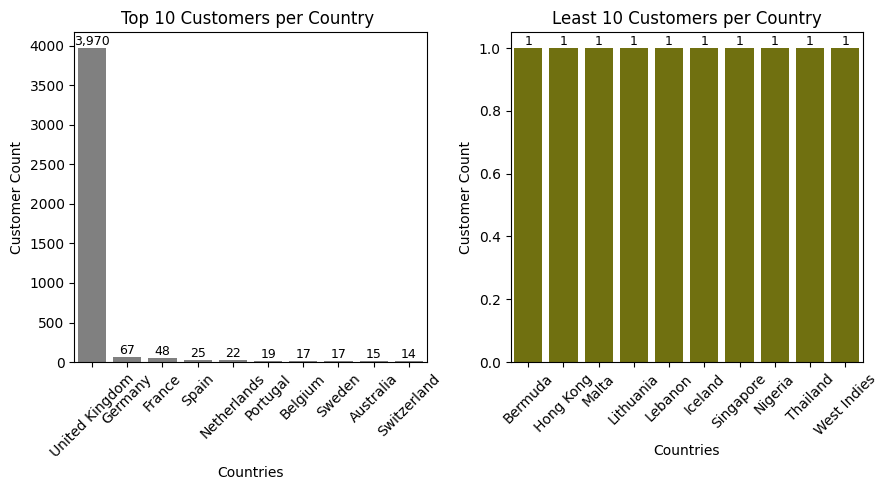

In [16]:
#2. Total number of customers per country

customers_per_country = sales_df.groupby("Country")["Customer ID"].nunique()
most_no_of_customers_per_country = customers_per_country.sort_values(ascending=False).head(10)
least_no_of_customers_per_country = customers_per_country.sort_values(ascending=False).tail(10)


#Visualize Customers number per Countries
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (9,5))
for ax in [ax1,ax2]:
  if ax == ax1:
    barplot = sns.barplot(x= most_no_of_customers_per_country.index, y= most_no_of_customers_per_country.values, color= 'gray', ax=ax)
    ax.set_title("Top 10 Customers per Country ")
  else:
    barplot = sns.barplot(x= least_no_of_customers_per_country.index, y= least_no_of_customers_per_country.values, color= 'olive', ax=ax)
    ax.set_title("Least 10 Customers per Country")
  ax.set_xlabel("Countries")
  ax.set_ylabel("Customer Count")
  ax.tick_params(axis= 'x', rotation= 45)
  for b in barplot.patches:
    barplot.annotate(
        f'{b.get_height():,.0f}', (b.get_x() + b.get_width()/2, b.get_height()),
        ha= 'center', va= 'bottom', fontsize = 9
    )
plt.tight_layout()
plt.show()


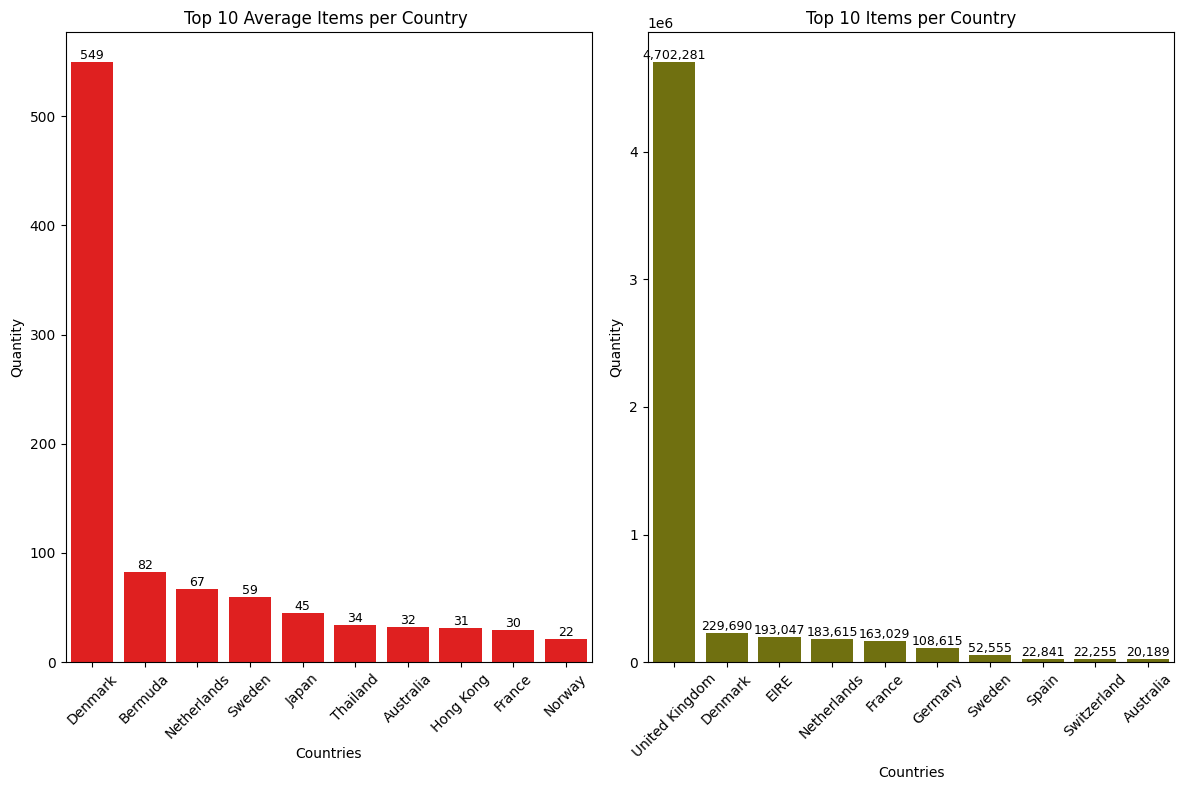

In [17]:
#3. Basket size per country
items_per_country = sales_df.groupby("Country")["Quantity"].agg(
    avrg_items_per_country = "mean",
    total_items_per_country = "sum"
)
avrg_items = items_per_country.sort_values(by= ["avrg_items_per_country"], ascending=False).head(10)
total_items = items_per_country.sort_values(by= ["total_items_per_country"], ascending=False).head(10)
#Visaualize top 10 items per country
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (12,8))
for ax in [ax1,ax2]:
  if ax == ax1:
    barplot = sns.barplot(x= avrg_items.index,
      y= avrg_items["avrg_items_per_country"],
    color= 'red', ax=ax)
    ax.set_title("Top 10 Average Items per Country ")
  else:
    barplot = sns.barplot(x= total_items.index,
      y= total_items["total_items_per_country"].sort_values(ascending=False).head(10),
        color= 'olive', ax=ax)
    ax.set_title("Top 10 Items per Country")
  ax.set_xlabel("Countries")
  ax.set_ylabel("Quantity")
  ax.tick_params(axis= 'x', rotation= 45)
  for b in barplot.patches:
    barplot.annotate(
        f'{b.get_height():,.0f}', (b.get_x() + b.get_width()/2, b.get_height()),
        ha= 'center', va= 'bottom', fontsize = 9
    )
plt.tight_layout()
plt.show()


In [18]:
#4. Return rate per country
returned_sales = refunds_df["Quantity"].sum()
total_sales = sales_df["Quantity"].sum()
return_rate = (abs(returned_sales)/total_sales) * 100
print(f"Return rate = {return_rate:.2f}%")


Return rate = 9.97%


As can be seen from the above graph, sales peaked at Novemeber,likely due to Black Friday and other events why sales was lowest in Feburary

###### Groupby Time
> Time-Based Analysis -- Discover peak sales period, timing for promotions and seasonality

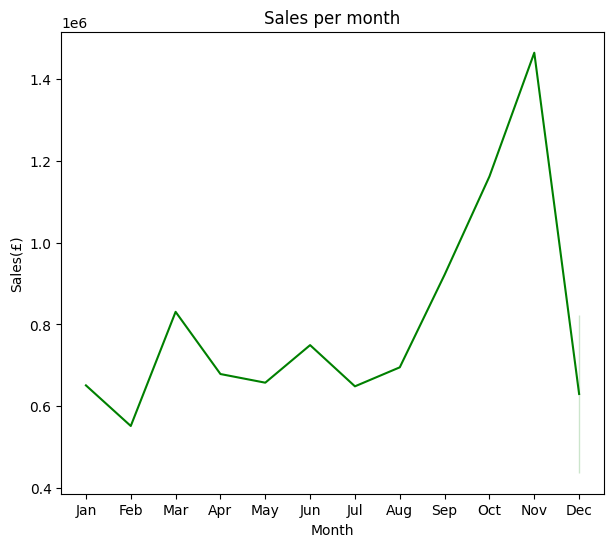

In [19]:
monthly_sales = sales_df.groupby(["InvoiceDate(Month)", "InvoiceDate(Year)"])["Total_Sales(£)"].sum()
updated = monthly_sales.reset_index()

#create a month dict
month_order = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4,
    "May": 5, "Jun": 6, "Jul": 7, "Aug": 8,
    "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
updated["month_order"] = updated["InvoiceDate(Month)"].map(month_order)
updated_sorted = updated[["month_order", "InvoiceDate(Month)", "InvoiceDate(Year)",
                          "Total_Sales(£)"]].sort_values(by=["month_order"]).set_index("month_order")


#Visualization
plt.figure(figsize=(7,6))
sns.lineplot(x= updated_sorted["InvoiceDate(Month)"], y=updated_sorted["Total_Sales(£)"], color='green', markers= 'x')
plt.xlabel("Month")
plt.ylabel("Sales(£)")
plt.title("Sales per month")
plt.show()


As can be seen, sales peaked in Novemeber. Could **Blackfriday Sales** be a possibility?

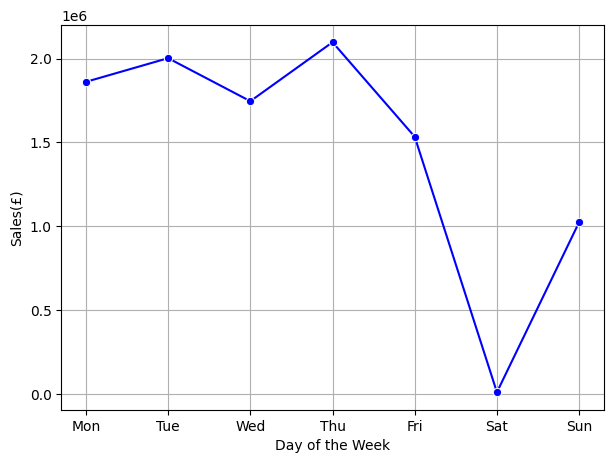

In [20]:
#2. What day of the week had the highest sales?
day_with_peak_sales = sales_df.groupby("InvoiceDate(Day)")["Total_Sales(£)"].sum()

#Create order
day_order= {
    "Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7
}
day_with_peak_sales = day_with_peak_sales.reset_index()
day_with_peak_sales["order"]= day_with_peak_sales["InvoiceDate(Day)"].map(day_order)
sorted_days = day_with_peak_sales.sort_values(by= ["order"])

#Visualize
plt.figure(figsize=(7,5))
sns.lineplot(x=sorted_days["InvoiceDate(Day)"], y=sorted_days["Total_Sales(£)"], marker="o", color="blue" )
plt.xlabel("Day of the Week")
plt.ylabel("Sales(£)")
plt.grid()
plt.show()


Peak sales was on Thursday

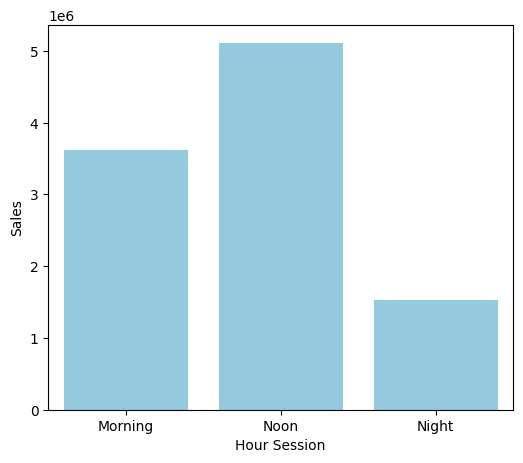

In [21]:
#3. Hourly Sales
hourly_group = sales_df.groupby("InvoiceDate(Time)")["Total_Sales(£)"].sum().reset_index()
hourly_order = {
    "Morning": 1, "Noon": 2, "Night": 3
}
hourly_group["order"] = hourly_group["InvoiceDate(Time)"].map(hourly_order)

sorted_hourly_df = hourly_group.sort_values(by=["order"])

#Visualize it
plt.figure(figsize=(6,5))
sns.barplot(x=sorted_hourly_df["InvoiceDate(Time)"], y=sorted_hourly_df["Total_Sales(£)"], color="skyblue")
plt.xlabel("Hour Session")
plt.ylabel("Sales")
plt.show()


###### Group by StockCode
- Product Level Analysis

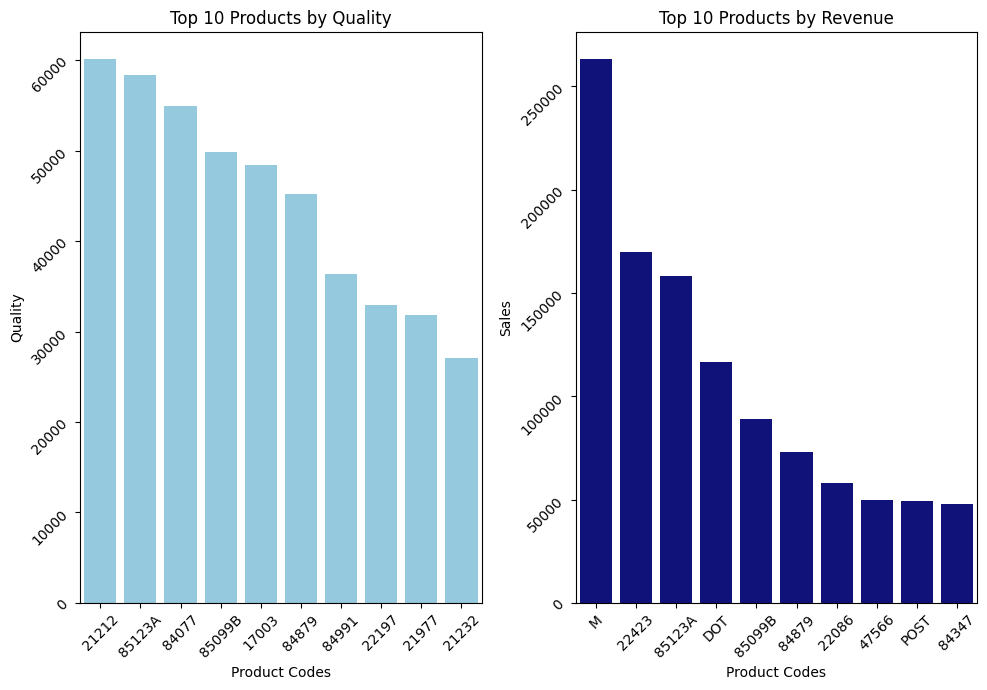

In [22]:
top_products = sales_df.groupby("StockCode")[["Quantity", "Total_Sales(£)"]].sum()
top_10_products_by_quality = top_products.sort_values(by=["Quantity"], ascending=False).head(10)
top_10_products_by_revenue = top_products.sort_values(by=["Total_Sales(£)"], ascending=False).head(10)

#Visualize
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
sns.barplot(x= top_10_products_by_quality.index, y=top_10_products_by_quality['Quantity'], color= "skyblue", ax=ax1)
ax1.set_title("Top 10 Products by Quality")
ax1.set_xlabel("Product Codes")
ax1.set_ylabel("Quality")

sns.barplot(x= top_10_products_by_revenue.index, y=top_10_products_by_revenue['Total_Sales(£)'], color= "darkblue", ax=ax2)
ax2.set_title("Top 10 Products by Revenue")
ax2.set_xlabel("Product Codes")
ax2.set_ylabel("Sales")

for ax in [ax1,ax2]:
  ax.tick_params(axis='both', rotation=45)

plt.tight_layout()
plt.show()


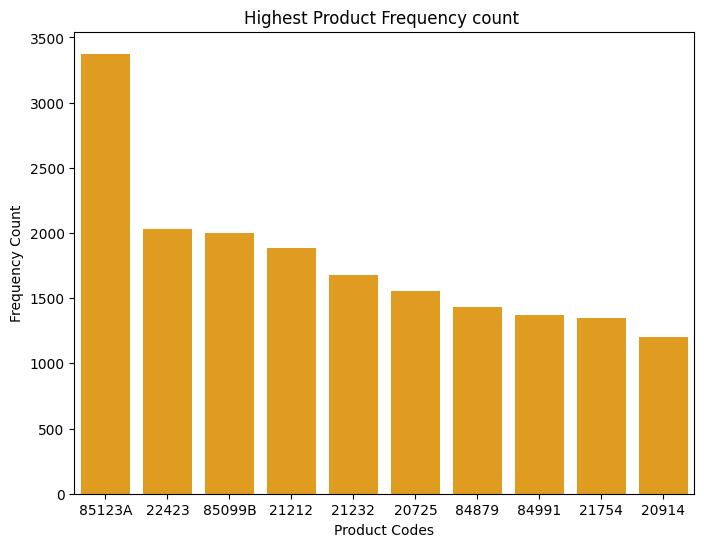

In [23]:
stockCode_list = sales_df["StockCode"].tolist()
# Stockcode_frequency_dict = {
#     i : stockCode_list.count(i)
#     for i in set(stockCode_list)
# }

##FOR EFFICIENCY
from collections import Counter
Stockcode_frequency_dict = Counter(stockCode_list)
sub_sales_df = sales_df.loc[:,["StockCode"]]
sub_sales_df["Stock_frequency"] = sub_sales_df["StockCode"].map(Stockcode_frequency_dict)


high_frequency_products = sub_sales_df.sort_values(by=["Stock_frequency"], ascending= False).drop_duplicates().head(10)

#Visualize
plt.figure(figsize=(8,6))
sns.barplot(x= high_frequency_products["StockCode"], y=high_frequency_products["Stock_frequency"], color= "orange")
plt.title("Highest Product Frequency count ")
plt.xlabel("Product Codes")
plt.ylabel("Frequency Count")

plt.show()


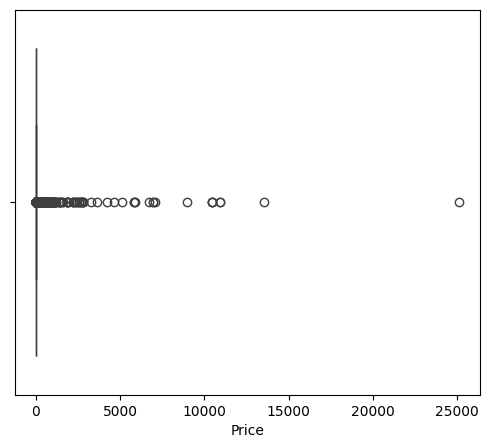


Min value= £0.001, Max value= £25111.090


,Price,StockCode
62299,0.001,PADS
74731,0.001,PADS
77702,0.001,PADS
79794,0.001,PADS
90798,0.001,PADS
97716,0.001,PADS
101718,0.001,PADS
104480,0.001,PADS
123947,0.001,PADS
156809,0.001,PADS


In [24]:
#Check for outliers

plt.figure(figsize=(6,5))
sns.boxplot(x=sales_df['Price'])
plt.show()

print(f"\nMin value= £{sales_df['Price'].min():.3f}, Max value= £{sales_df['Price'].max():.3f}")

#Display highest and lowest price
min_price = sales_df['Price'].min()
max_price = sales_df['Price'].max()
filt = sales_df['Price'].isin([min_price, max_price])
min_max_prices = sales_df[filt][["Price", "StockCode"]]
min_max_prices

###### Groupby Customer ID
Customer Behaviour Analysis

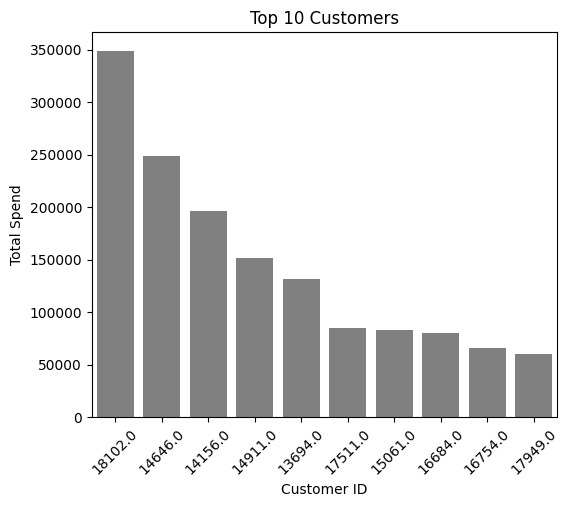

In [25]:
#1. Total spend per customer
customer_spend = sales_df.groupby("Customer ID")["Total_Sales(£)"].sum().reset_index()

# Exclude annonymous customer ID
customer_spend = customer_spend[customer_spend["Customer ID"]!= 10101.0]
top_customer_spend = customer_spend.sort_values(by= "Total_Sales(£)", ascending=False).head(10)

#Visualize
plt.figure(figsize=(6,5))
sns.barplot(
    x=top_customer_spend["Customer ID"], y=top_customer_spend["Total_Sales(£)"],
    color="gray", order= top_customer_spend.sort_values("Total_Sales(£)", ascending=False)["Customer ID"],

    )
plt.title("Top 10 Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.xticks(rotation = 45)
plt.show()

In [26]:
sales_df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate(Day),InvoiceDate(Month),InvoiceDate(Year),InvoiceDate(Time),Total_Sales(£)
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Tue,Dec,2009,Morning,83.4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Tue,Dec,2009,Morning,81.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Tue,Dec,2009,Morning,81.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Tue,Dec,2009,Morning,100.8
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Tue,Dec,2009,Morning,30.0


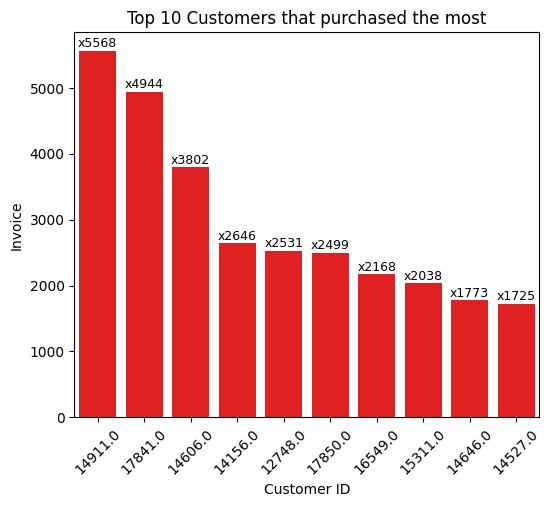

In [27]:
#2. Purchase frequency
purc_freqency = sales_df.groupby("Customer ID")["Invoice"].count().reset_index()
purc_freqency = purc_freqency[purc_freqency["Customer ID"] != 10101.0]
purc_freqency_ = purc_freqency.sort_values(by= "Invoice", ascending=False).head(10)

#Visualize
plt.figure(figsize=(6,5))
sns.barplot(x= purc_freqency_["Customer ID"], y= purc_freqency_["Invoice"],
            color= "red", order = purc_freqency_["Customer ID"]
            )
plt.title("Top 10 Customers that purchased the most")
plt.xlabel("Customer ID")
plt.ylabel("Invoice")
for i, val in enumerate(purc_freqency_["Invoice"]):
  plt.text(
      i, val + 5, f'x{val}', ha='center', va='bottom', fontsize=9
  )
plt.xticks(rotation = 45)
plt.show()

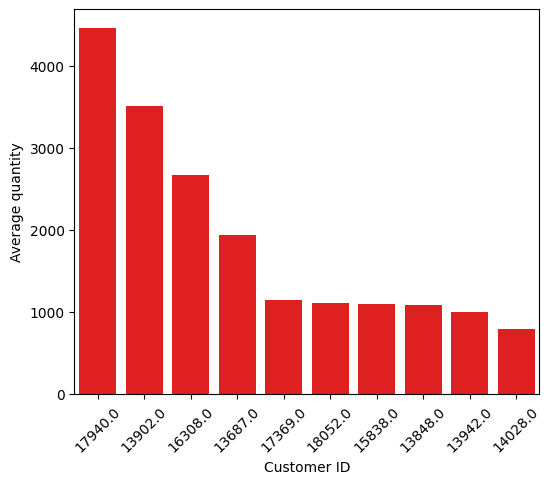

In [28]:
#3. Average basket size
avrg_basket_size = sales_df.groupby("Customer ID")["Quantity"].mean().reset_index()
avrg_basket_size = avrg_basket_size[avrg_basket_size["Customer ID"] != 10101.0]
avrg_basket_size = avrg_basket_size.sort_values(by= "Quantity", ascending=False).head(10)

#Visualize
plt.figure(figsize=(6,5))
sns.barplot(x= avrg_basket_size["Customer ID"], y= avrg_basket_size["Quantity"],
            color= "red", order = avrg_basket_size["Customer ID"]
            )

plt.xlabel("Customer ID")
plt.ylabel("Average quantity")

plt.xticks(rotation = 45)
plt.show()

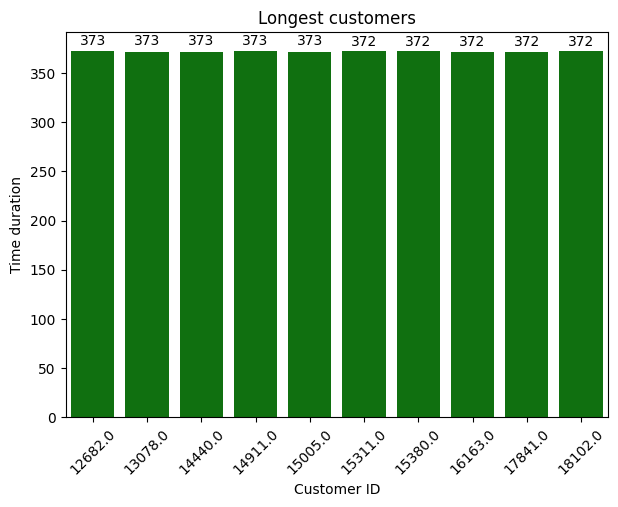

In [29]:
#4. First vs last purchase
purchase = sales_df.groupby("Customer ID")["InvoiceDate"].agg(
    first_date = "min",
    end_date = "max"
)
purchase["Time duration"] = (purchase["end_date"] - purchase["first_date"]).dt.days
purchase = purchase.reset_index()
purchase_duration = purchase[purchase["Customer ID"] != 10101.0].drop(columns= ["first_date",	"end_date"]).sort_values(
    by= ["Time duration"], ascending= False
).head(10)

#visualize
plt.figure(figsize=(7,5))
sns.barplot(x= purchase_duration["Customer ID"], y= purchase_duration["Time duration"], color="green")
plt.title("Longest customers")
plt.xticks(rotation=45)
for i,val in enumerate(purchase_duration["Time duration"]):
  plt.text(i, val + 3, f'{val}', ha="center", va="bottom")
plt.show()


###### Return & Refunds

In [30]:
print(f"The total refunded invoices are {len(refunds_df.Invoice.unique())}\n")

#Products returned the most
returned_products = refunds_df.groupby("Invoice")["Quantity"].sum().sort_values().head()
returned_products

The total refunded invoices are 6712



,Quantity
Invoice,
C524235,-87167
519017,-9600
C536757,-9360
504311,-9200
507913,-9000


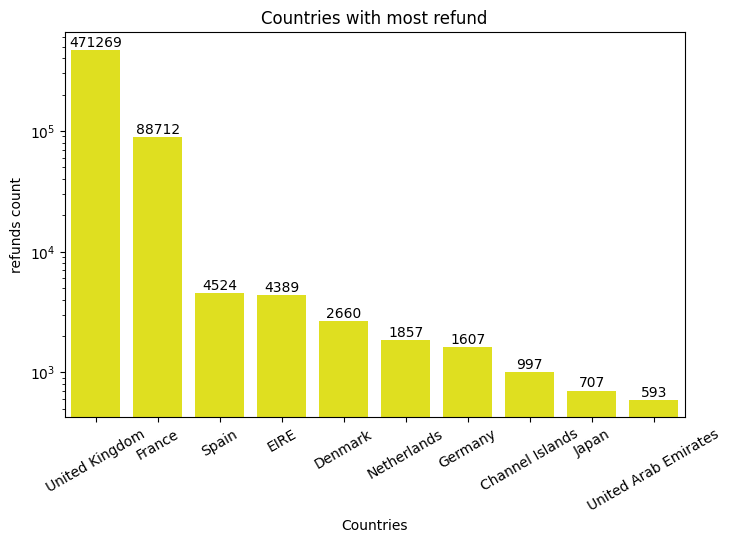

In [31]:
#Country-wise return behaviour
country_refunds = refunds_df.groupby("Country")["Quantity"].sum().sort_values().head(10)

#visualize
plt.figure(figsize=(8,5))
sns.barplot(x= country_refunds.index, y= abs(country_refunds.values), color="yellow")
plt.title("Countries with most refund")
plt.xlabel("Countries")
plt.ylabel("refunds count")
plt.yscale("log")
plt.xticks(rotation=30)
for i,val in enumerate(abs(country_refunds.values)):
  plt.text(i, val + 3, f'{val}', ha="center", va="bottom")

plt.show()

In [32]:
#drop Invoice Date
sales_df = sales_df.drop(columns=["InvoiceDate"])

##### **Correlations and Distributions**

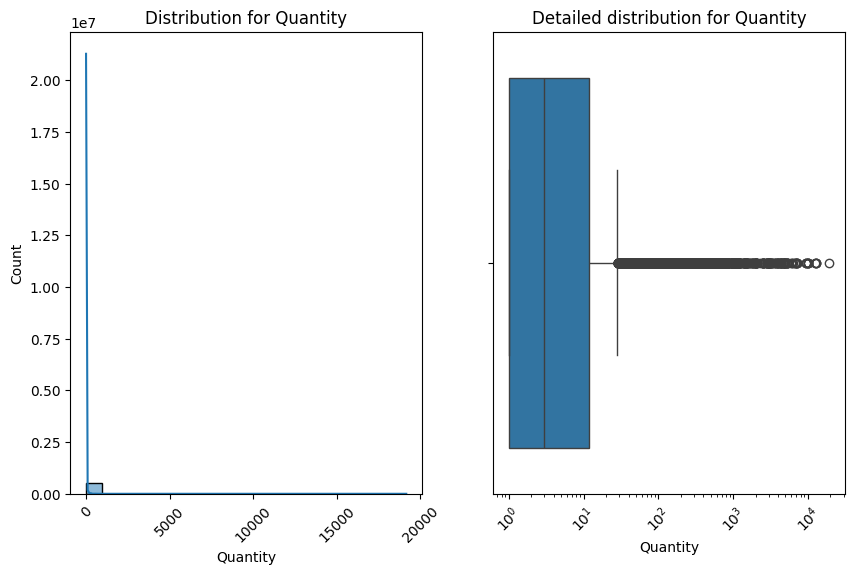

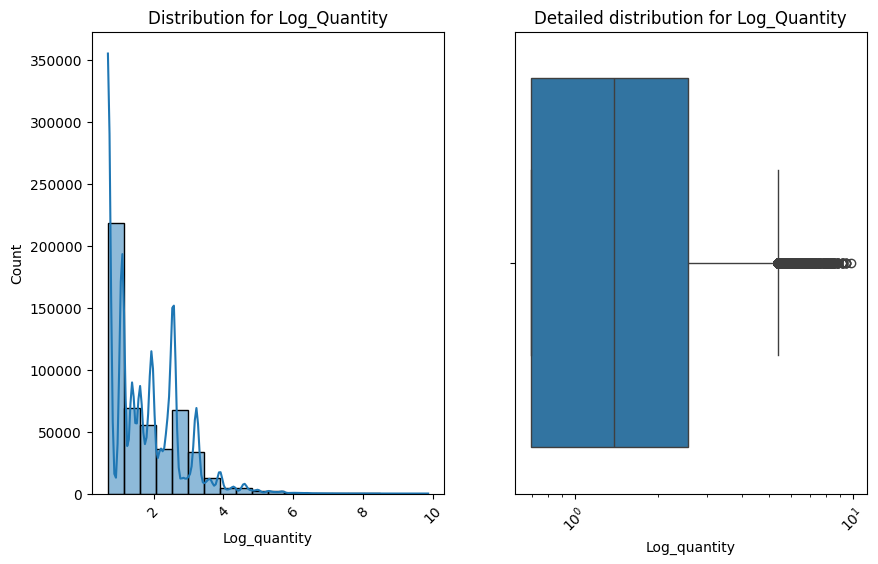

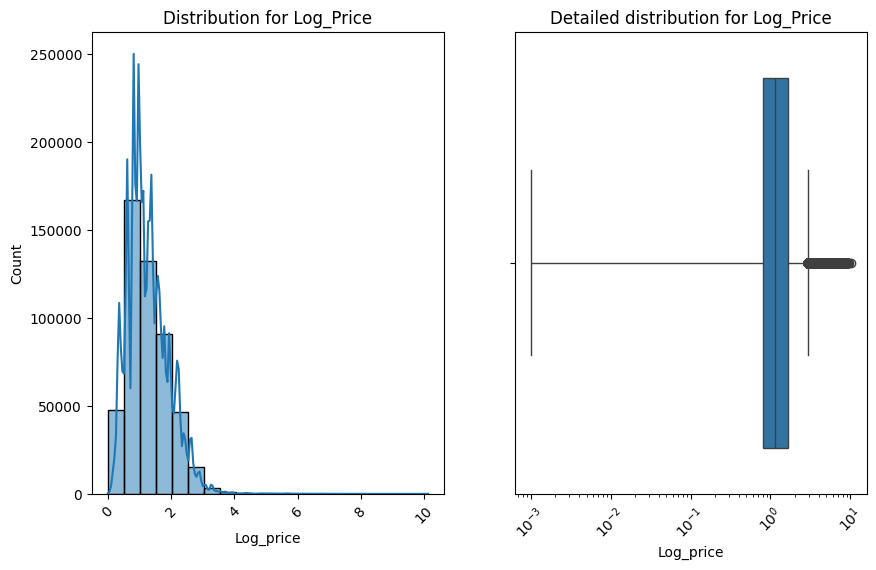

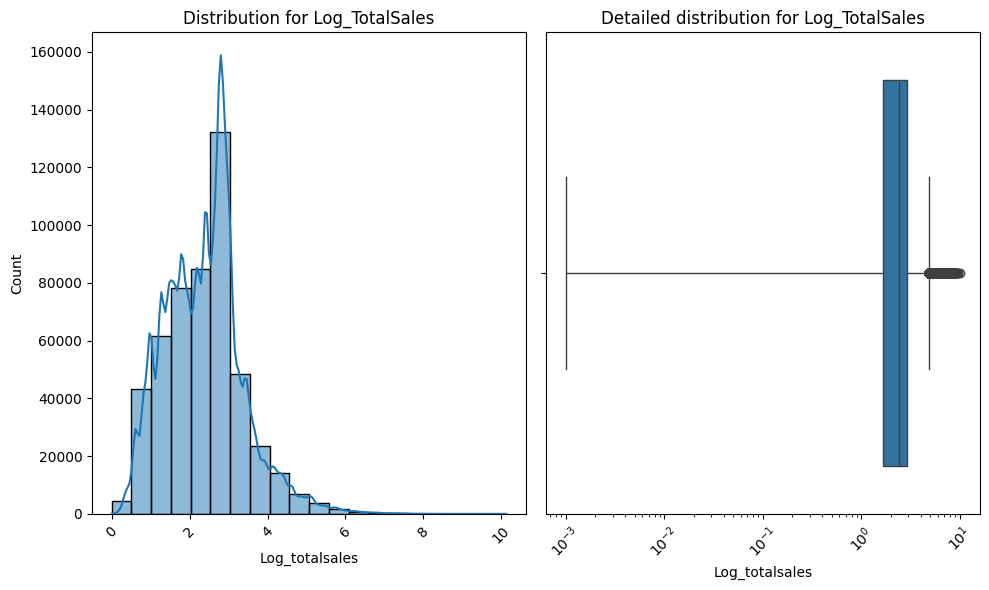

In [33]:
sales_df["Log_Quantity"] = np.log1p(sales_df["Quantity"])
sales_df["Log_Price"] = np.log1p(sales_df["Price"])
sales_df["Log_TotalSales"] = np.log1p(sales_df["Total_Sales(£)"])
numerical_cols = sales_df.select_dtypes(include=np.number).columns
categorical_cols = sales_df.select_dtypes(include= "object").columns

for col in numerical_cols:
  if col in ["Customer ID", "Price", "Total_Sales(£)"]:
    continue
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
  sns.histplot(x=sales_df[col], kde=True, bins=20, ax=ax1)
  ax1.set_title(f"Distribution for {col}")
  ax1.set_xlabel(f"{col.capitalize()}")


  sns.boxplot(x=sales_df[col], ax=ax2)
  ax2.set_title(f"Detailed distribution for {col}")
  ax2.set_xlabel(f"{col.capitalize()}")
  ax2.set_xscale(value= 'log')
  #ax2.set_xlim(100, 2000)

  for a in [ax1,ax2]:
    a.tick_params(axis='x', rotation=45)
    #a.grid(True)
plt.tight_layout()
plt.show()



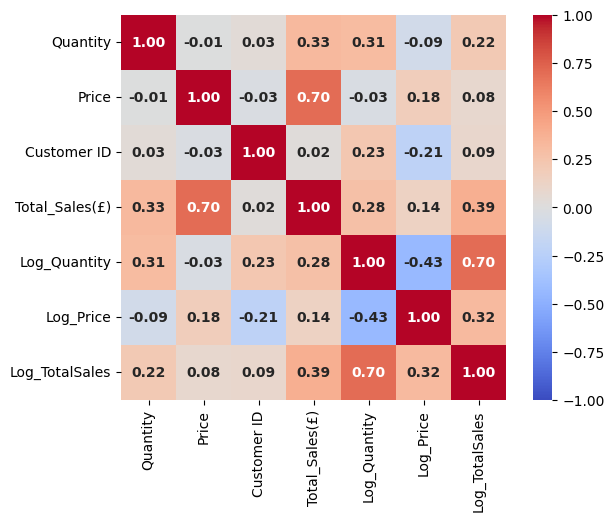

In [34]:
corr = sales_df[numerical_cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(
    data= corr, cmap= "coolwarm", annot= True, fmt= '.2f', vmin= -1, vmax=1, square= True,
    annot_kws = {"fontsize": 10, "fontweight": "bold"}
)
plt.show()

In [35]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504731 entries, 0 to 525460
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Invoice             504731 non-null  object 
 1   StockCode           504731 non-null  object 
 2   Quantity            504731 non-null  int64  
 3   Price               504731 non-null  float64
 4   Customer ID         504731 non-null  float64
 5   Country             504731 non-null  object 
 6   InvoiceDate(Day)    504731 non-null  object 
 7   InvoiceDate(Month)  504731 non-null  object 
 8   InvoiceDate(Year)   504731 non-null  object 
 9   InvoiceDate(Time)   504731 non-null  object 
 10  Total_Sales(£)      504731 non-null  float64
 11  Log_Quantity        504731 non-null  float64
 12  Log_Price           504731 non-null  float64
 13  Log_TotalSales      504731 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 57.8+ MB


#### **Statistical Modeling**
T-Test:

>H₀: Average spending per transaction is the same in the UK and France

>H₁: The averages are different

**ANOVA:**
>Compare mean spending across 3+ countries (e.g., UK, France, EIRE)

**Chi-Square Test:**

>Compare whether return rate (refund proportion) is independent of country

**ANOVA by Time:**

>Does day of the week significantly affect sales?

- Steps:

>State hypotheses clearly (H₀, H₁)

>Check assumptions (normality, variance)

>Perform the test (scipy.stats)

>Interpret p-value & practical implication

In [36]:
from scipy.stats import ttest_ind
#TWO_SAMPLE TTEST - Compares the mean of two independent groups
#H₀: Average spending per transaction is the same in the UK and France
#H₁: The averages are different
avrg_spend = sales_df.groupby(["Country", "Invoice"])["Total_Sales(£)"].sum()
filtered_avrg = avrg_spend.loc[["United Kingdom","France"],:].reset_index()
uk_spend = filtered_avrg[filtered_avrg["Country"] == "United Kingdom"]["Total_Sales(£)"]
fr_spend = uk_spend = filtered_avrg[filtered_avrg["Country"] == "France"]["Total_Sales(£)"]

#perform test
t_stat, p_value = ttest_ind(uk_spend, fr_spend)
print("T-Stats: ", t_stat, "\nP_value: ", p_value)
if p_value <= 0.05:
  print("Reject hypothesis: Average Spending differs")
else:
  print("Fail to reject hypothesis: Averages are similar")

T-Stats:  0.0 
P_value:  1.0
Fail to reject hypothesis: Averages are similar


In [37]:
#ANOVA - COMPARE THE MEAN OF three or more group
#H₀: time of the week does not affect sales
#H₁: It does matter

week_day_sales= sales_df.groupby(["Invoice", "InvoiceDate(Day)"])["Total_Sales(£)"].sum().reset_index()
print(week_day_sales)

beginning_week = week_day_sales[week_day_sales["InvoiceDate(Day)"].isin(["Mon", "Tue"])]["Total_Sales(£)"]
mid_week = week_day_sales[week_day_sales["InvoiceDate(Day)"].isin(["Wed", "Thu"])]["Total_Sales(£)"]
weekend = week_day_sales[week_day_sales["InvoiceDate(Day)"].isin(["Fri", "Sat", "Sun"])]["Total_Sales(£)"]

#Perform ANOVA
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(beginning_week, mid_week, weekend)
print("F_statistics: ", f_stat)
print("P-Value: ", p_value)
if p_value <= 0.05:
  print("Reject hypothesis: Sales is dependent on the time of the week ")
else:
  print("Fail to reject hypothesis: Insignificant difference")

       Invoice InvoiceDate(Day)  Total_Sales(£)
0       489434              Tue          505.30
1       489435              Tue          145.80
2       489436              Tue          630.33
3       489437              Tue          310.75
4       489438              Tue         2286.24
...        ...              ...             ...
20947   538168              Thu          310.45
20948   538169              Thu           93.45
20949   538170              Thu          317.59
20950   538171              Thu          300.64
20951  C496350              Mon          373.57

[20952 rows x 3 columns]
F_statistics:  12.491164381849222
P-Value:  3.787811112848424e-06
Reject hypothesis: Sales is dependent on the time of the week 


In [38]:
#Perform chi-square test
df["Return_Status"] = df["Quantity"].apply(lambda x: "Refund" if x <= 0 else "Sale")

#H₀: Return status is independent of country (country doesn’t matter).
#H₁: Return status depends on country (some countries return more/less).


#Create contigency table
contigency_table = pd.crosstab(df['Country'], df['Return_Status'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contigency_table)
print(f"Chi2 Stat: {chi2:.3f}, p-value: {p:.5f}")


if p < 0.05:
  print("Reject H₀ → return behavior differs significantly by country")

else:
  print("fail to reject H₀ → no evidence of difference")


Chi2 Stat: 1472.584, p-value: 0.00000
Reject H₀ → return behavior differs significantly by country


In [39]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504731 entries, 0 to 525460
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Invoice             504731 non-null  object 
 1   StockCode           504731 non-null  object 
 2   Quantity            504731 non-null  int64  
 3   Price               504731 non-null  float64
 4   Customer ID         504731 non-null  float64
 5   Country             504731 non-null  object 
 6   InvoiceDate(Day)    504731 non-null  object 
 7   InvoiceDate(Month)  504731 non-null  object 
 8   InvoiceDate(Year)   504731 non-null  object 
 9   InvoiceDate(Time)   504731 non-null  object 
 10  Total_Sales(£)      504731 non-null  float64
 11  Log_Quantity        504731 non-null  float64
 12  Log_Price           504731 non-null  float64
 13  Log_TotalSales      504731 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 57.8+ MB


#### Regression Modeling

In [40]:
#Drop columns
sales_df = sales_df.drop(columns= ["Invoice", "Customer ID", "Total_Sales(£)", "Quantity", "Price", "StockCode"])

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,  root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = sales_df.drop(columns= "Log_TotalSales")
y = sales_df["Log_TotalSales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

#Split into numerical and categorical features
cat_cols = sales_df.select_dtypes(include= "object").columns
num_cols = sales_df.select_dtypes(include= np.number).columns.tolist()
num_cols.remove("Log_TotalSales")

#Apply encoding
encoder = OneHotEncoder(drop= "first")
X_train_encoded = encoder.fit_transform(X_train[cat_cols])
X_test_encoded = encoder.transform(X_test[cat_cols])

#Apply Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

#Combine
X_train_combined = np.hstack([X_train_scaled, X_train_encoded.toarray()])
X_test_combined = np.hstack([X_test_scaled, X_test_encoded.toarray()])




from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_combined, y_train)

#Predict
y_pred = model.predict(X_test_combined)
y_train_pred = model.predict(X_train_combined)


#Evaluate
rmse_test = root_mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("RMSE Train: ", rmse_train, "RMSE test: ", rmse_test)
print("R2-Score Train: ", r2_train, "R2-Score Test: ", r2_test)



RMSE Train:  0.18699037420640324 RMSE test:  0.1880763812779463
R2-Score Train:  0.9651302899943169 R2-Score Test:  0.9646368993158543
